## Week 6 - Logistic Regression

Similar to linear regresison, training a logistic regression model means estimating a set of weights (one weight per feature, plus an extra weight called the bias or the intercept) on a dataset called the training set. 

In classification the aim is to classify an example into one of two classes (target feature is 0 or 1).
If we have several classes, we use a one-vs-all approach, by creating one dataset for each class.

Remember that linear regression was directly predicting a numeric target feature:
$target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n$

In classification we can interpret the target feature as the probability of class membership:
$probability(target=1|descriptive\_features)=w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n$

The prediction output can be any real-number, but we can threshold it at 0.5 to decide the class.
If $probability(target=1|descriptive\_features) \geq 0.5$ then predict class 1, else predict class 0.

The model estimated in logistic regression assumes the probability of class membership is given by the logistic function:
$probability(target=1|descriptive\_features)=logistic(w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n)$
where $logistic(x)$ is defined as: $logistic(x) = \frac{e ^ x}{1 + e ^ x} = \frac{1}{1+e^{-x}}$

There is a direct relationship between the linear combination and the logistic function.

When $w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n \geq 0$ then 
$logistic(w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n) \geq 0.5$. This means that points above the estimated line (e.g., $w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n \geq 0$) will be classified in class 1, and points below the line (e.g., $w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n < 0$), will be classified in class 0. This linear combination estimated in logistic regression is called the decision surface of the classifier.

The learned logistic regresison model (e.g., set of weights $w_0, w_1, ..., w_n$) can be used to predict the probability of the target feature for new examples where we know the descriptive features, but not the target feature. 

In this tutorial, we look at the Titanic dataset provided by seaborn package and build LogisticRegression model to predict the survival of a person.

#### Import Packages

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from seaborn import load_dataset 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
data = load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Understanding the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- The target variable in the dataset is `survived`.     
- There are a few null values in `age`, `embarked` and `deck`.      
- Also, some of the columns contain the same information such as `sex`, `who` and `adult_male`. Therefore, drop such columns and preprocess the others.

#### Processing the data 

In [4]:
columns = ['alive', 'alone', 'embark_town', 'who', 'sex', 'deck', 'class']
data_modified = data.drop(columns, axis=1)
data_modified.head()

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


In [5]:
# Fill in the missing values in age using the mean age and embarked column using the mode 
data_modified = data_modified.fillna({'age' : data_modified['age'].mean(), 
                                      'embarked': data_modified['embarked'].mode()[0]})
# Getting dummy variables is similar to one-hot encoding. Here, we choose to show only two dummy variables 
# as the third category of 'C' is indicated by the case of embarked_Q=0 and embarked_S=0
data_modified = pd.concat([data_modified.drop(columns='embarked'), pd.get_dummies(data_modified['embarked'], drop_first=True)], 
                          axis=1).rename(columns={'Q': 'embarked_Q', 'S': 'embarked_S'})
data_modified.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,0,1
1,1,1,38.0,1,0,71.2833,False,0,0
2,1,3,26.0,0,0,7.9250,False,0,1
3,1,1,35.0,1,0,53.1000,False,0,1
4,0,3,35.0,0,0,8.0500,True,0,1


In [6]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    bool   
 7   embarked_Q  891 non-null    uint8  
 8   embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(2)
memory usage: 44.5 KB


#### Building the model

Multiple-logistic regression

In [7]:
X = data_modified.drop('survived', axis = 1)
y = data_modified['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_regressor = LogisticRegression(solver='liblinear', random_state=1).fit(X_train, y_train)
y_predicted = log_regressor.predict(X_test)

actual_vs_predicted = pd.concat([y_test, pd.DataFrame(y_predicted, columns=['Predicted'], index=y_test.index)], axis=1)
actual_vs_predicted.head()

,survived,Predicted
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1


In [9]:
print("\nCoefficients: \n", log_regressor.coef_)
print("\nIntercept: \n", log_regressor.intercept_)
print('\nNumber of features seen during fit:', log_regressor.n_features_in_)


Coefficients: 
 [[-0.72969851 -0.0083328  -0.53483057 -0.10847948  0.00529937 -3.05876744
  -0.18632525 -0.34124879]]

Intercept: 
 [3.42606824]

Number of features seen during fit: 8


#### Evaluate the model

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

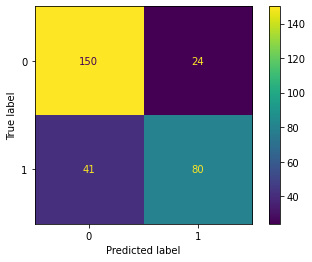

In [11]:
ConfusionMatrixDisplay.from_estimator(log_regressor, X_test, y_test);

There are 41 + 24 = 65 misclassifications by Logistic Regression model

In [12]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, pos_label=1)
recall = recall_score(y_test, y_predicted, pos_label=1)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Accuracy: 0.780
Precision score: 0.769
Recall score: 0.661


### Additional Reading

1. Look at [Logistic Regression: Introduction](https://www.joshuapkeller.com/page/introregression/logistic.html) for more details.